In [1]:
import numpy as np

In [2]:
from scipy.io import loadmat
from scipy.linalg import expm, logm

In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.rcParams['font.family'] = 'serif'

In [116]:
data_path = '/Users/linggeli/neuroscience/data/SuperChris/super_chris_extraction_odor2s.mat'
data_odor = loadmat(data_path)

In [117]:
trial_info = data_odor['trialInfo']
select_odor_B = (trial_info[:, 0] == 1) & (trial_info[:, 1] == 1) & (trial_info[:, 3] == 2)
select_odor_C = (trial_info[:, 0] == 1) & (trial_info[:, 1] == 1) & (trial_info[:, 3] == 3)
lfp_odor_B = data_odor['lfpEpoch'][select_odor_B, 2000:4000, 5:10]
lfp_odor_C = data_odor['lfpEpoch'][select_odor_C, 2000:4000, 5:10]
print(lfp_odor_B.shape)
print(lfp_odor_C.shape)

(41, 2000, 5)
(37, 2000, 5)


In [118]:
cov_series_odor_B = np.zeros((20, 50, 5, 5))  
utv_series_odor_B = np.zeros((20, 50, 15))  
for i in range(20):
    for t in range(50):
        lfp_window = lfp_odor_B[i, (t * 10):(t * 10 + 50), :]
        cov = np.cov(lfp_window, rowvar=False)
        cov_series_odor_B[i, t, :, :] = cov
        utv = logm(cov)[np.triu_indices(5)]
        utv_series_odor_B[i, t, :] = utv

In [119]:
cov_series_odor_C = np.zeros((20, 50, 5, 5)) 
utv_series_odor_C = np.zeros((20, 50, 15)) 
for i in range(20):
    for t in range(50):
        lfp_window = lfp_odor_C[i, (t * 10):(t * 10 + 50), :]
        cov = np.cov(lfp_window, rowvar=False)
        cov_series_odor_C[i, t, :, :] = cov
        utv = logm(cov)[np.triu_indices(5)]
        utv_series_odor_C[i, t, :] = utv

In [120]:
median_series_odor_B = np.median(utv_series_odor_B, axis=0)
print(median_series_odor_B.shape)
median_series_odor_C = np.median(utv_series_odor_C, axis=0)
print(median_series_odor_C.shape)

(50, 15)
(50, 15)


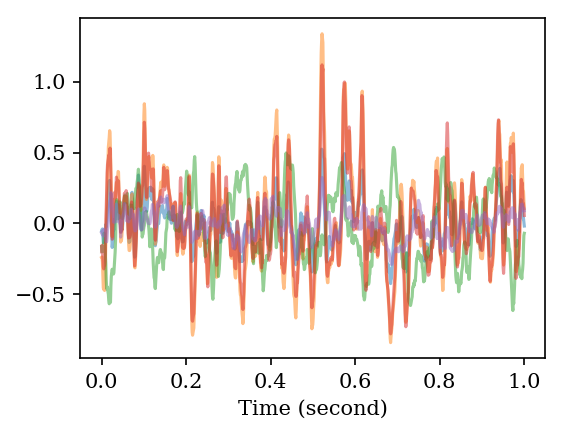

In [121]:
fig = plt.figure(figsize=(4, 3), dpi=150)
x = np.linspace(0, 1, 1000)
for j in range(5):
    plt.plot(x, lfp_odor_B[0, :1000, j], alpha=0.5)
#plt.xticks(np.linspace(0, 1, 50))
plt.xlabel('Time (second)')
#plt.savefig('logeuclidean.png')
plt.show()

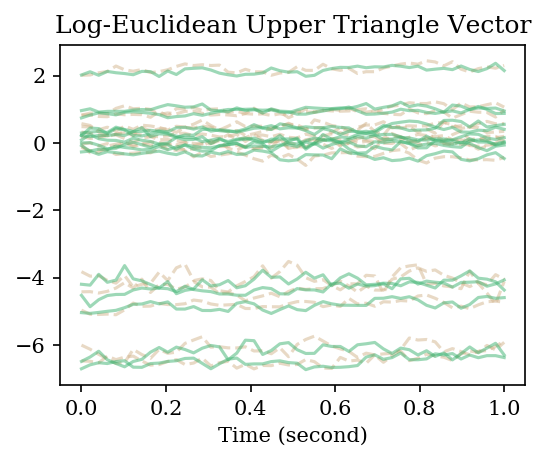

In [122]:
fig = plt.figure(figsize=(4, 3), dpi=150)
x = np.linspace(0, 1, 50)
for j in range(15):
    plt.plot(x, median_series_odor_B[:, j], '--', color='tan', alpha=0.5)
for j in range(15):
    plt.plot(x, median_series_odor_C[:, j], color='mediumseagreen', alpha=0.5)
plt.title('Log-Euclidean Upper Triangle Vector')
#plt.xticks(np.linspace(0, 1, 50))
plt.xlabel('Time (second)')
#plt.savefig('logeuclidean.png')
plt.show()

In [155]:
median_separation = np.sqrt(np.sum((median_series_odor_B - median_series_odor_C) ** 2, axis=1))
print(median_separation.shape)

(50,)


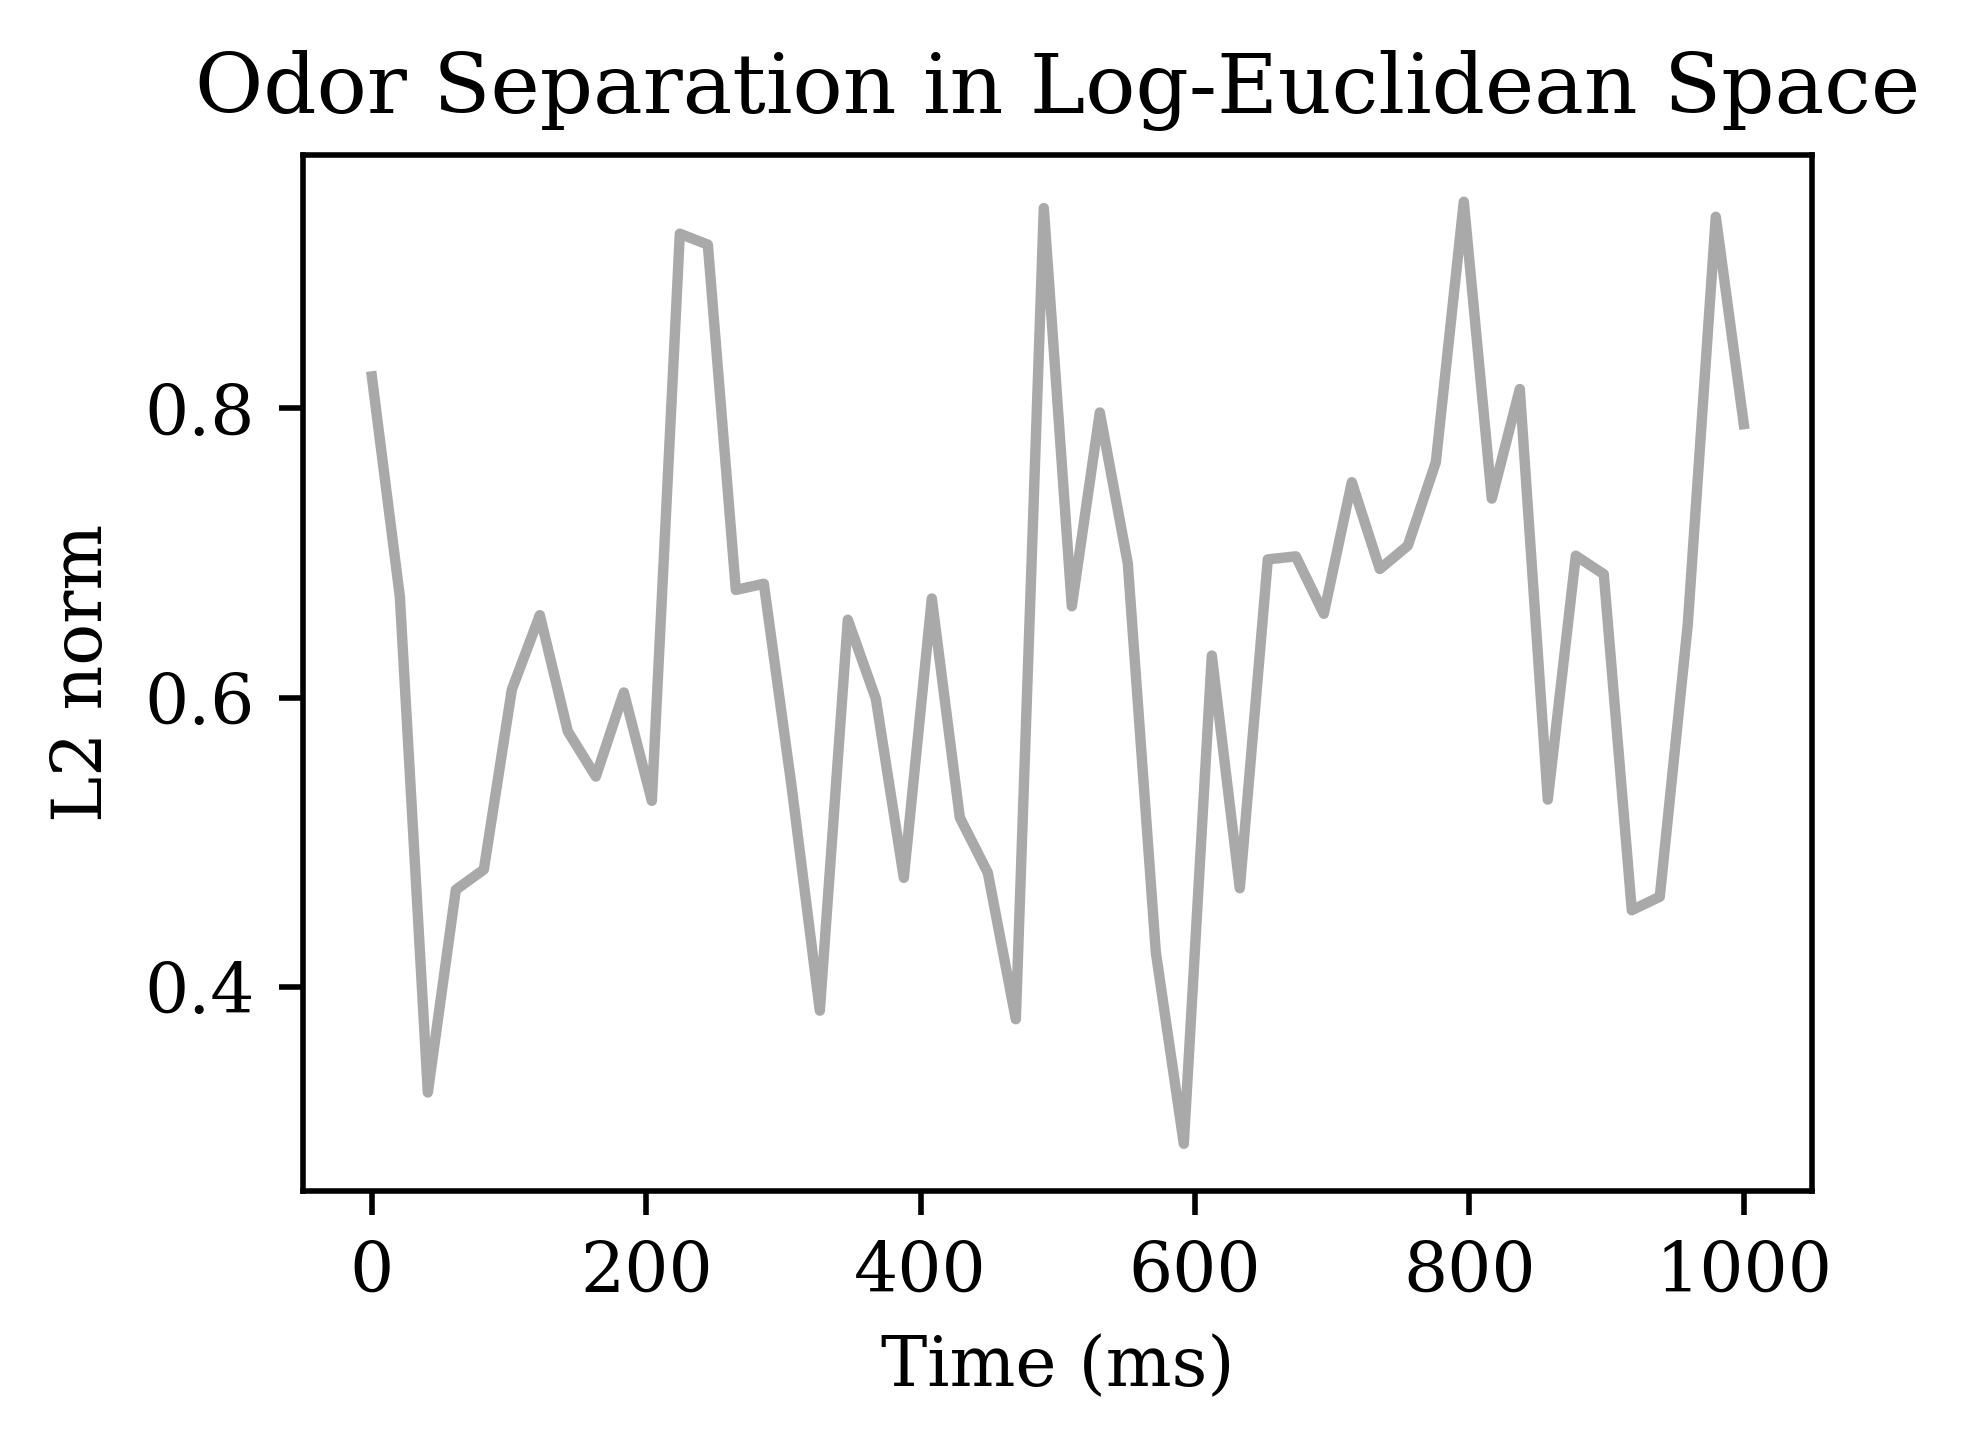

In [156]:
fig = plt.figure(figsize=(4, 3), dpi=500)
x = np.linspace(0, 1000, 50)
plt.plot(x, median_separation, color='darkgrey')
plt.title('Odor Separation in Log-Euclidean Space')
plt.xlabel('Time (ms)')
plt.ylabel('L2 norm')
fig.tight_layout()
plt.savefig('separation1.png')
plt.show()

In [125]:
all_vector = np.concatenate([utv_series_odor_B, utv_series_odor_C]).reshape((2000, 15))
Y = all_vector - np.mean(all_vector, axis=0)
print(Y.shape)

(2000, 15)


In [126]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components=2)
components = pca.fit_transform(Y)

In [128]:
Y_hat = pca.inverse_transform(components)
mse = np.mean((Y - Y_hat) ** 2)
print(mse)

0.13088665032215552


In [129]:
print(components.shape)

(2000, 2)


In [130]:
components_odor_B = components[:1000, :].reshape((20, 50, 2))
median_components_odor_B = np.median(components_odor_B, axis=0)
print(median_components_odor_B.shape)
components_odor_C = components[1000:, :].reshape((20, 50, 2))
median_components_odor_C = np.median(components_odor_C, axis=0)
print(median_components_odor_C.shape)

(50, 2)
(50, 2)


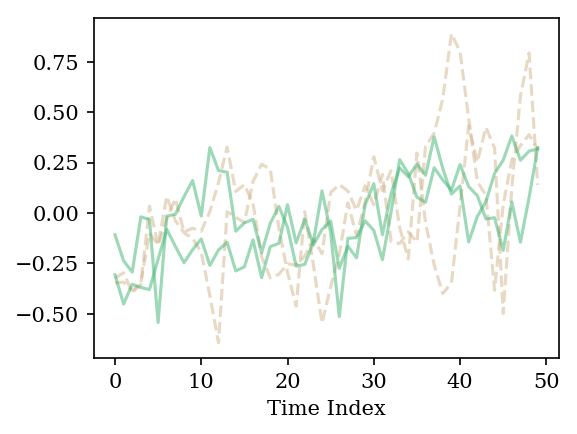

In [131]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(median_components_odor_B[:, j], '--', color='tan', alpha=0.5)
for j in range(2):
    plt.plot(median_components_odor_C[:, j], color='mediumseagreen', alpha=0.5)
plt.xlabel('Time Index')
#plt.savefig('logeuclidean.png')
plt.show()

In [132]:
median_separation = np.mean((median_components_odor_B - median_components_odor_C) ** 2, axis=1)
print(median_separation.shape)

(50,)


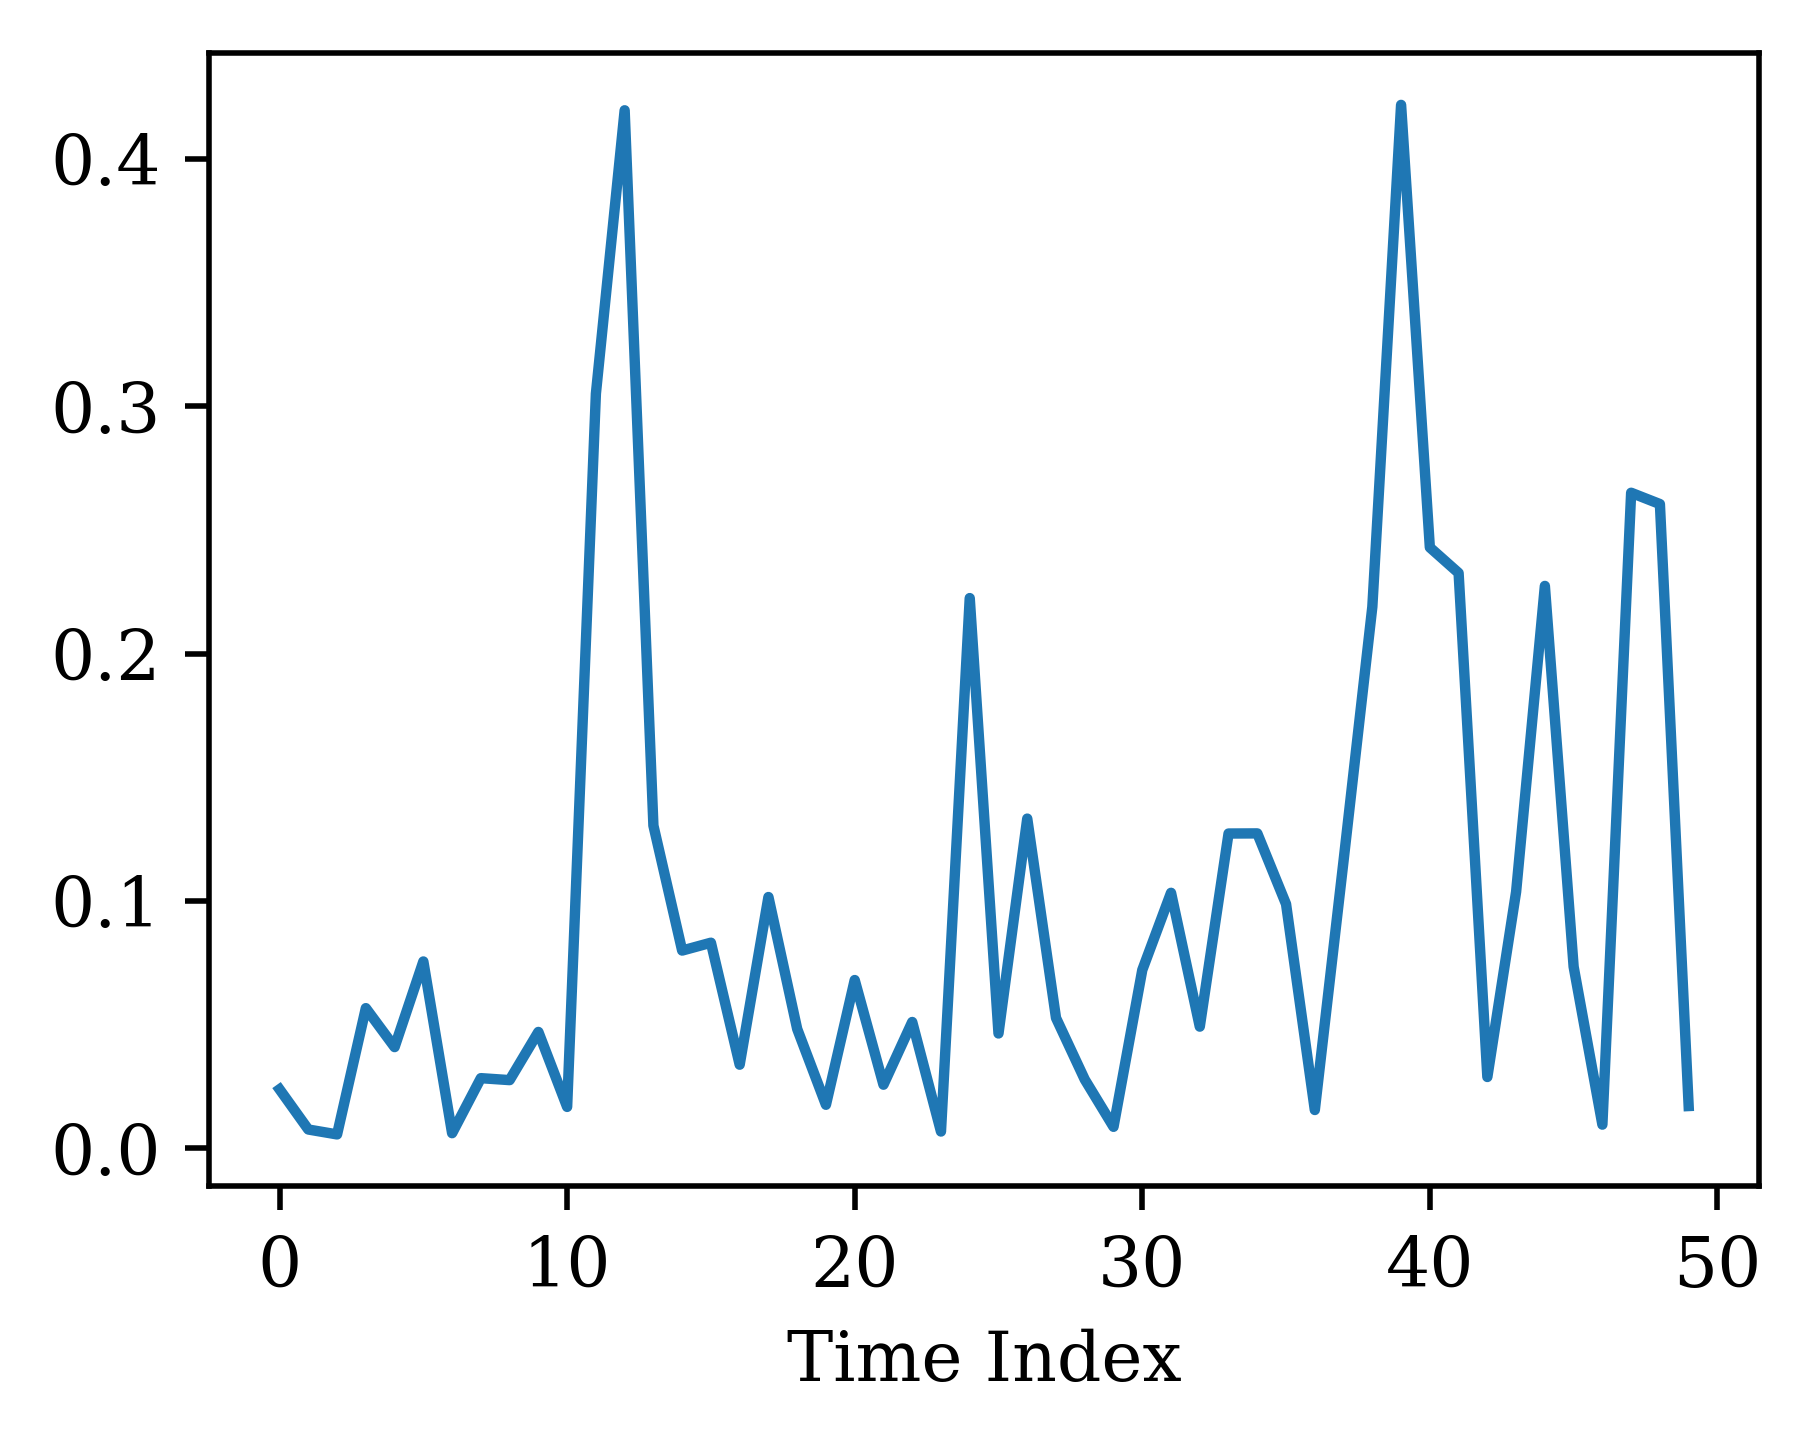

In [133]:
fig = plt.figure(figsize=(4, 3), dpi=500)
plt.plot(median_separation)
plt.xlabel('Time Index')
#plt.savefig('separation1.png')
plt.show()

In [134]:
import pickle

with open('results_stable.pkl', 'rb') as fp:
    results = pickle.load(fp)

In [135]:
F_sample, loading_sample, variance_sample, theta_sample, traces_hist, mse_history = results

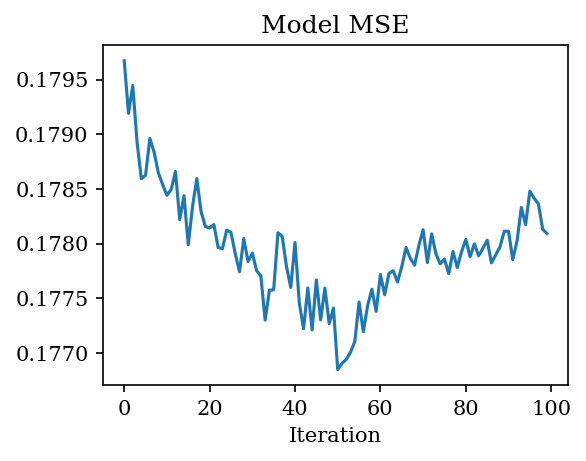

In [136]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(mse_history)
plt.title('Model MSE')
plt.xlabel('Iteration')
plt.show()

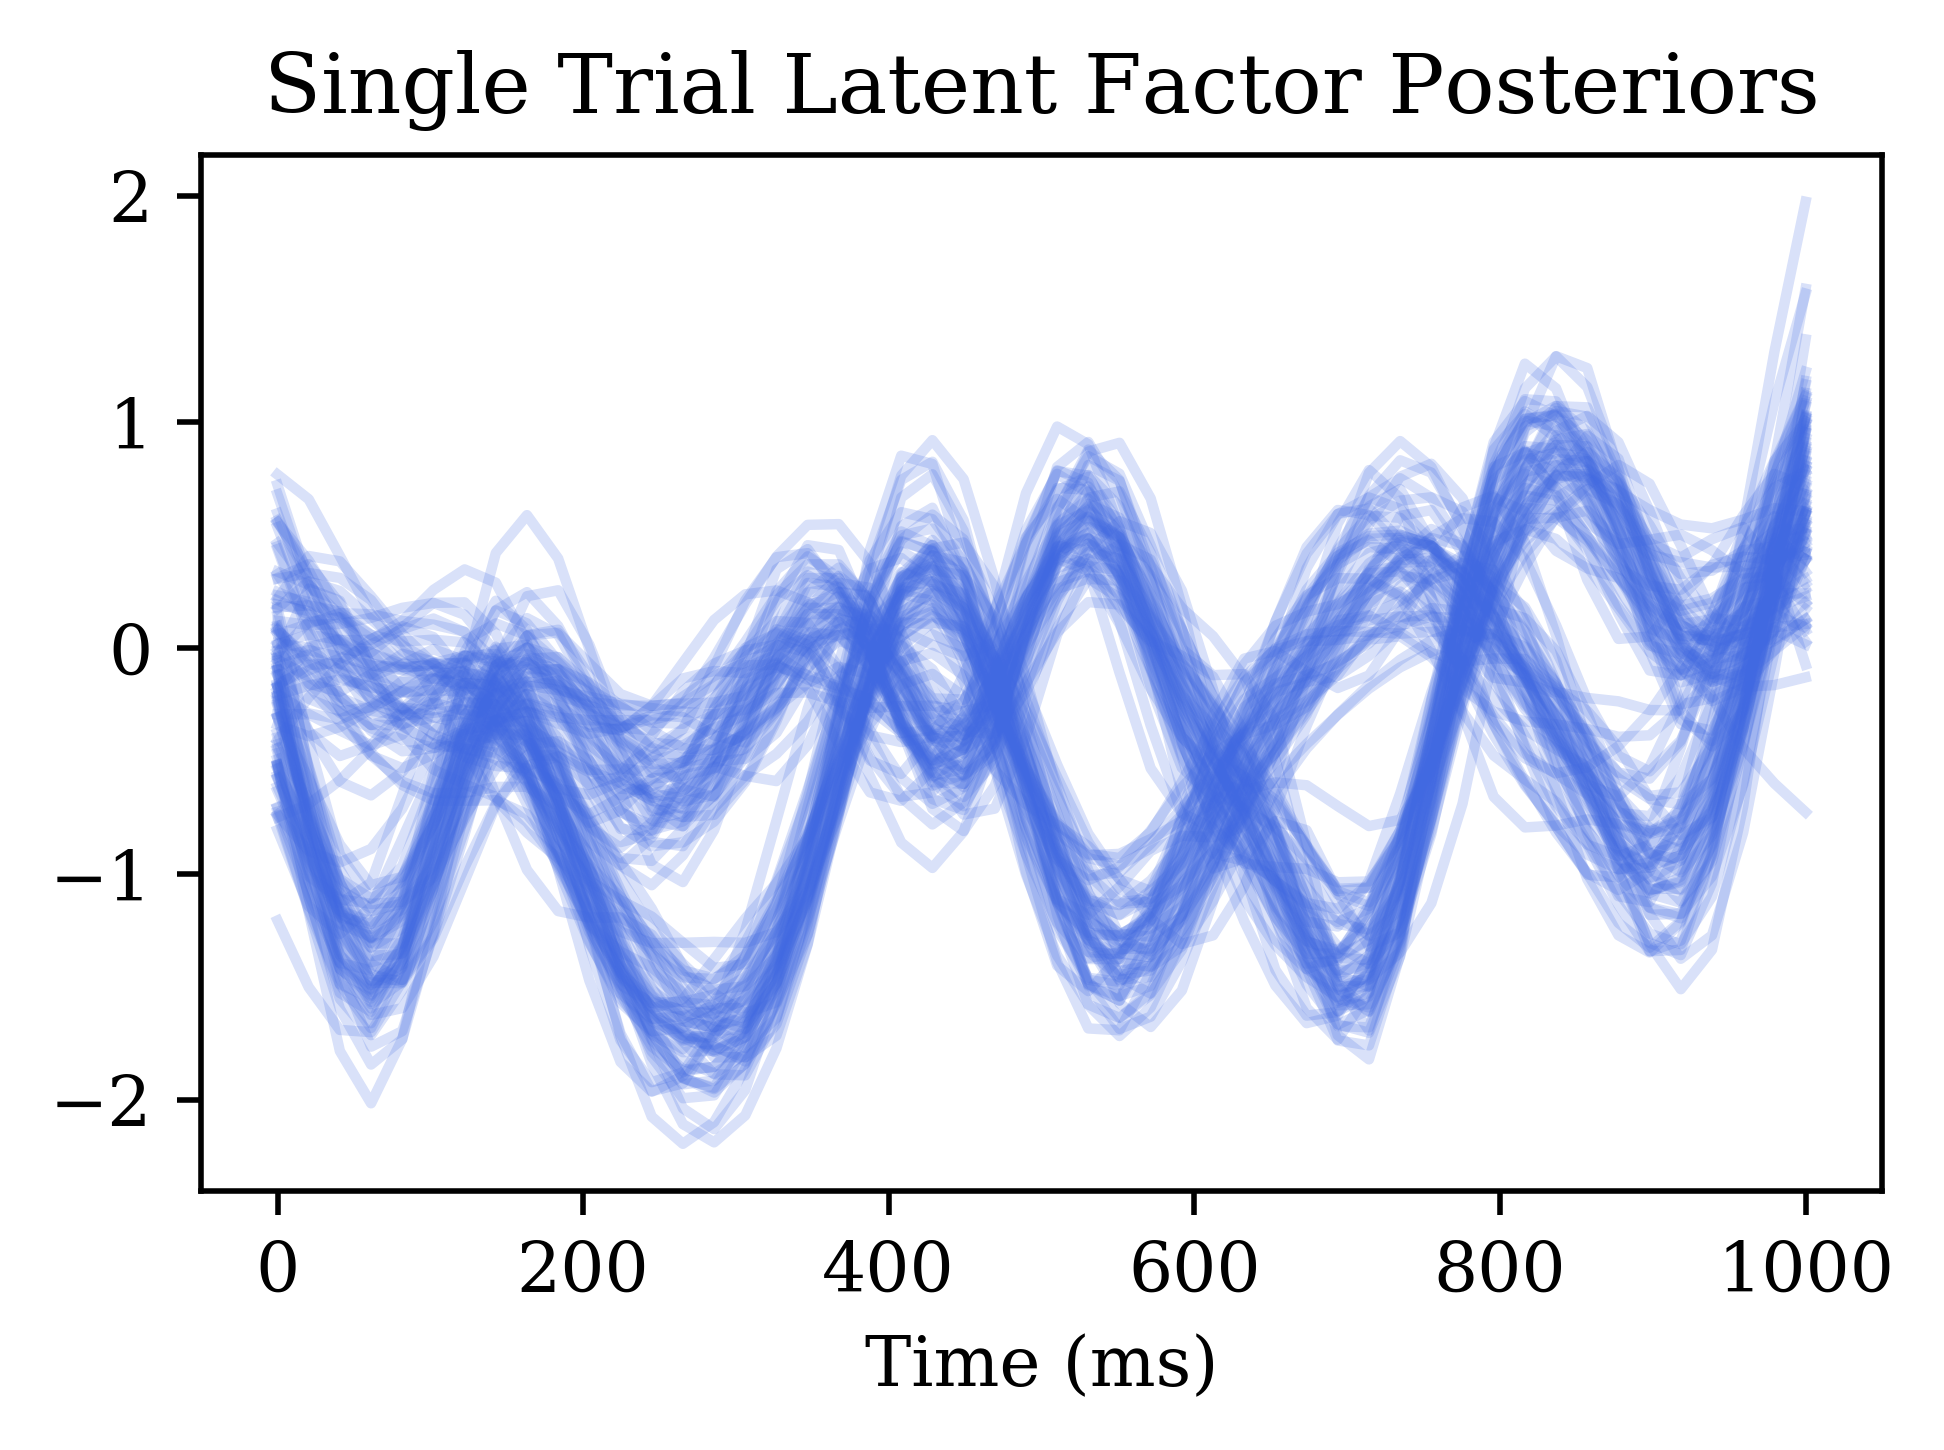

In [144]:
fig = plt.figure(figsize=(4, 3), dpi=500)
x = np.linspace(0, 1000, 50)
for i in range(50, 100):
    plt.plot(x, F_sample[i, :50, 0], color='royalblue', alpha=0.2)
    plt.plot(x, F_sample[i, :50, 1], color='royalblue', alpha=0.2)
plt.title('Single Trial Latent Factor Posteriors')
plt.xlabel('Time (ms)')
fig.tight_layout()
plt.savefig('trial.png')
plt.show()

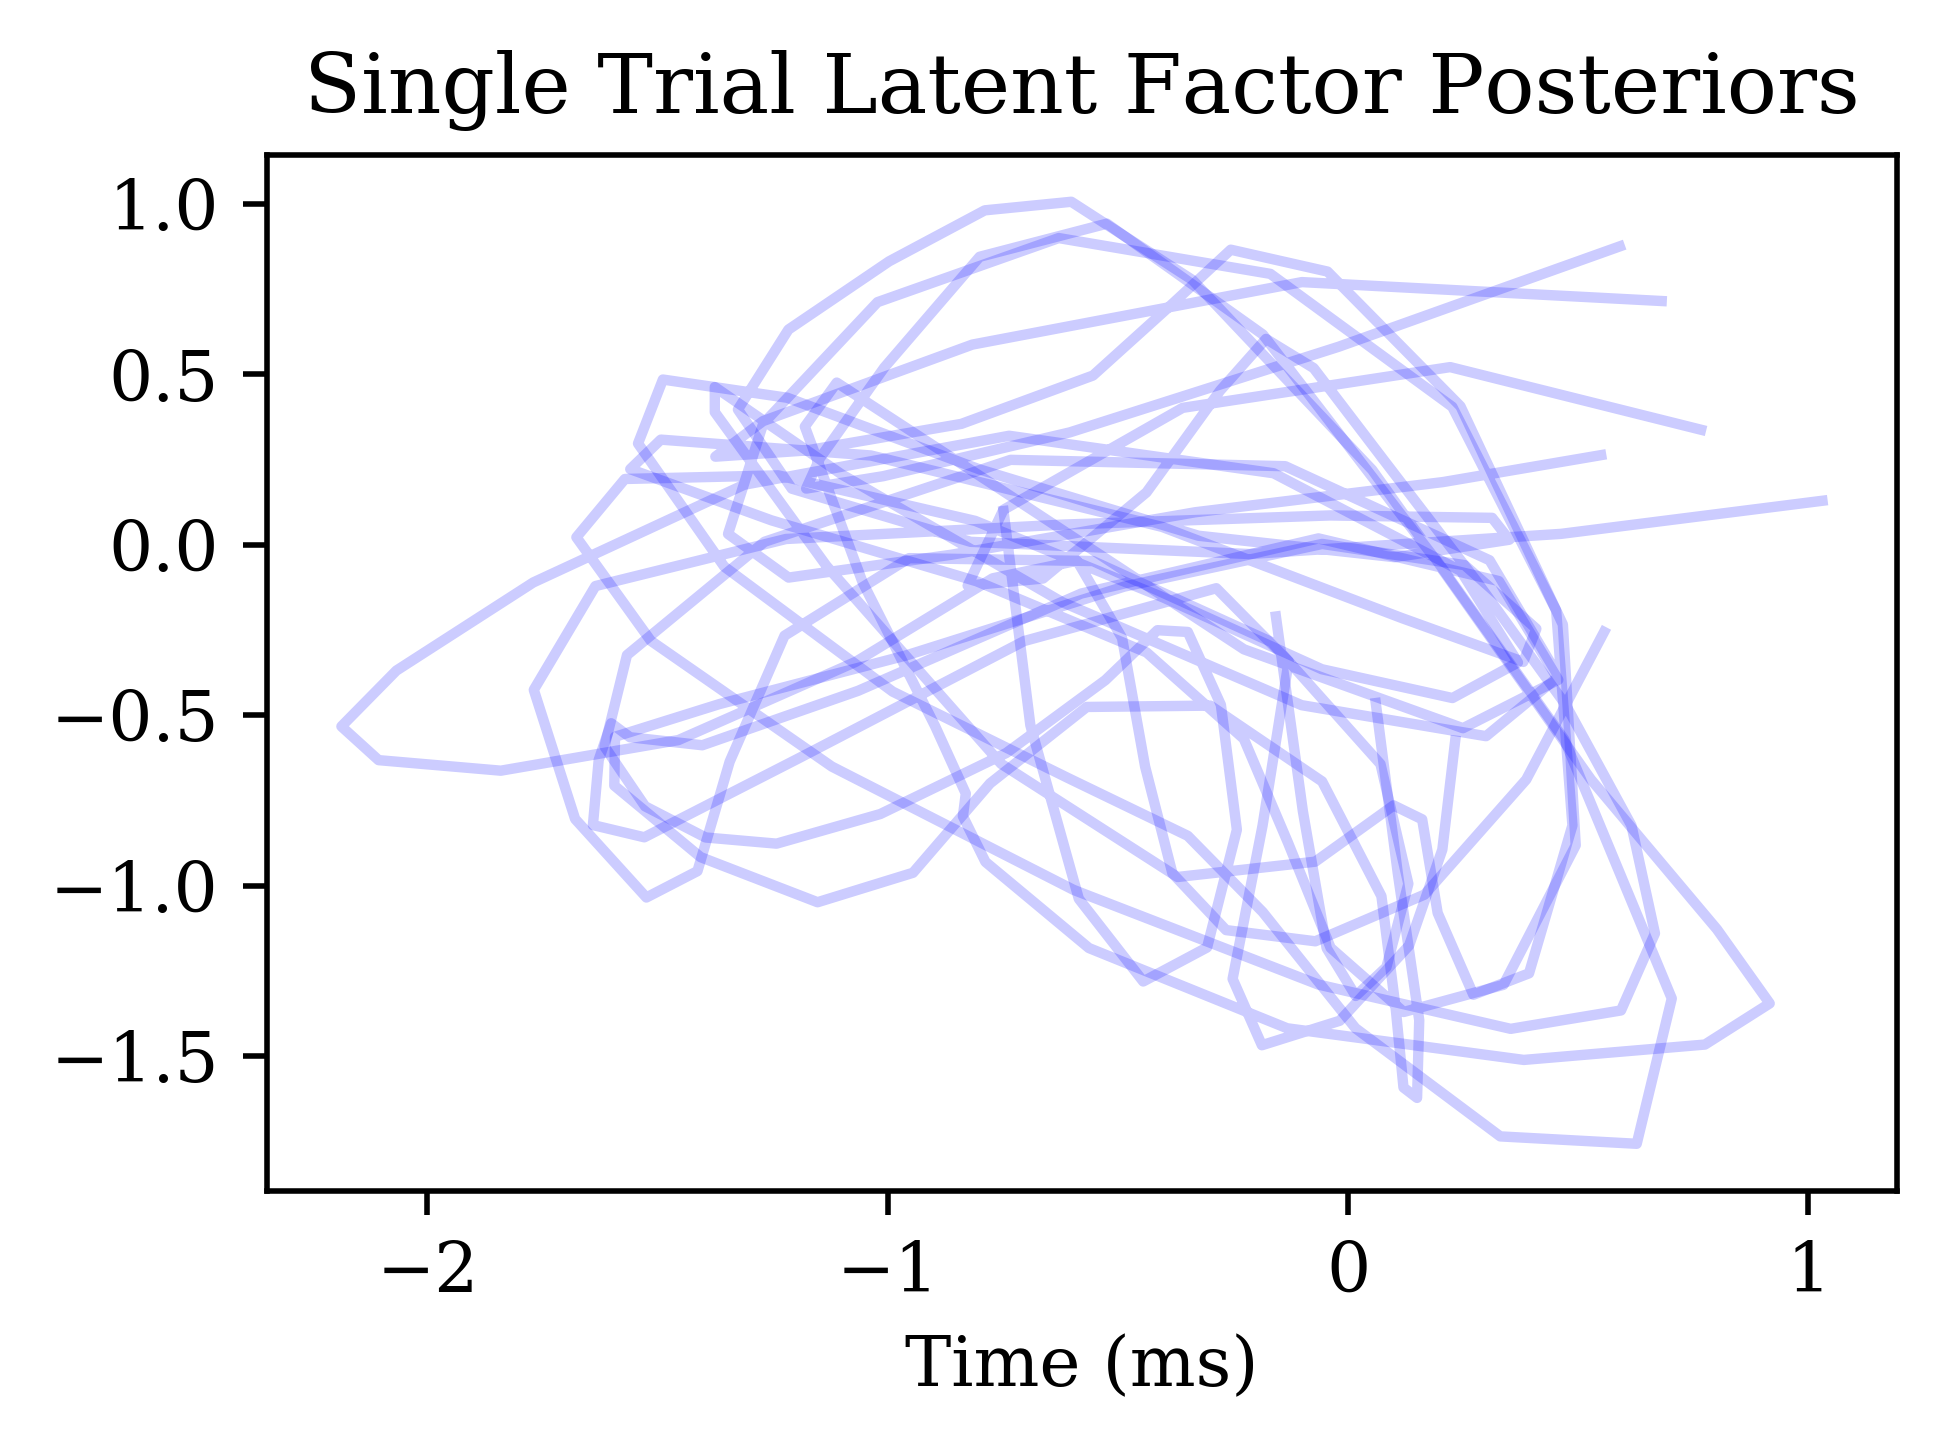

In [29]:
fig = plt.figure(figsize=(4, 3), dpi=500)
for i in range(95, 100):
    plt.plot(F_sample[i, :50, 0], F_sample[i, :50, 1], color='blue', alpha=0.2)
plt.title('Single Trial Latent Factor Posteriors')
plt.xlabel('Time (ms)')
fig.tight_layout()
#plt.savefig('trial.png')
plt.show()

In [73]:
factor1_median_odor_B = np.zeros((50, 50))
factor2_median_odor_B = np.zeros((50, 50))
factor1_median_odor_C = np.zeros((50, 50))
factor2_median_odor_C = np.zeros((50, 50))
for i in range(50):
    factor1_median_odor_B[i, :] = np.median(F_sample[i + 50, :1000, 0].reshape((20, 50)), axis=0)
    factor2_median_odor_B[i, :] = np.median(F_sample[i + 50, :1000, 1].reshape((20, 50)), axis=0)
    factor1_median_odor_C[i, :] = np.median(F_sample[i + 50, 1000:, 0].reshape((20, 50)), axis=0)
    factor2_median_odor_C[i, :] = np.median(F_sample[i + 50, 1000:, 1].reshape((20, 50)), axis=0)

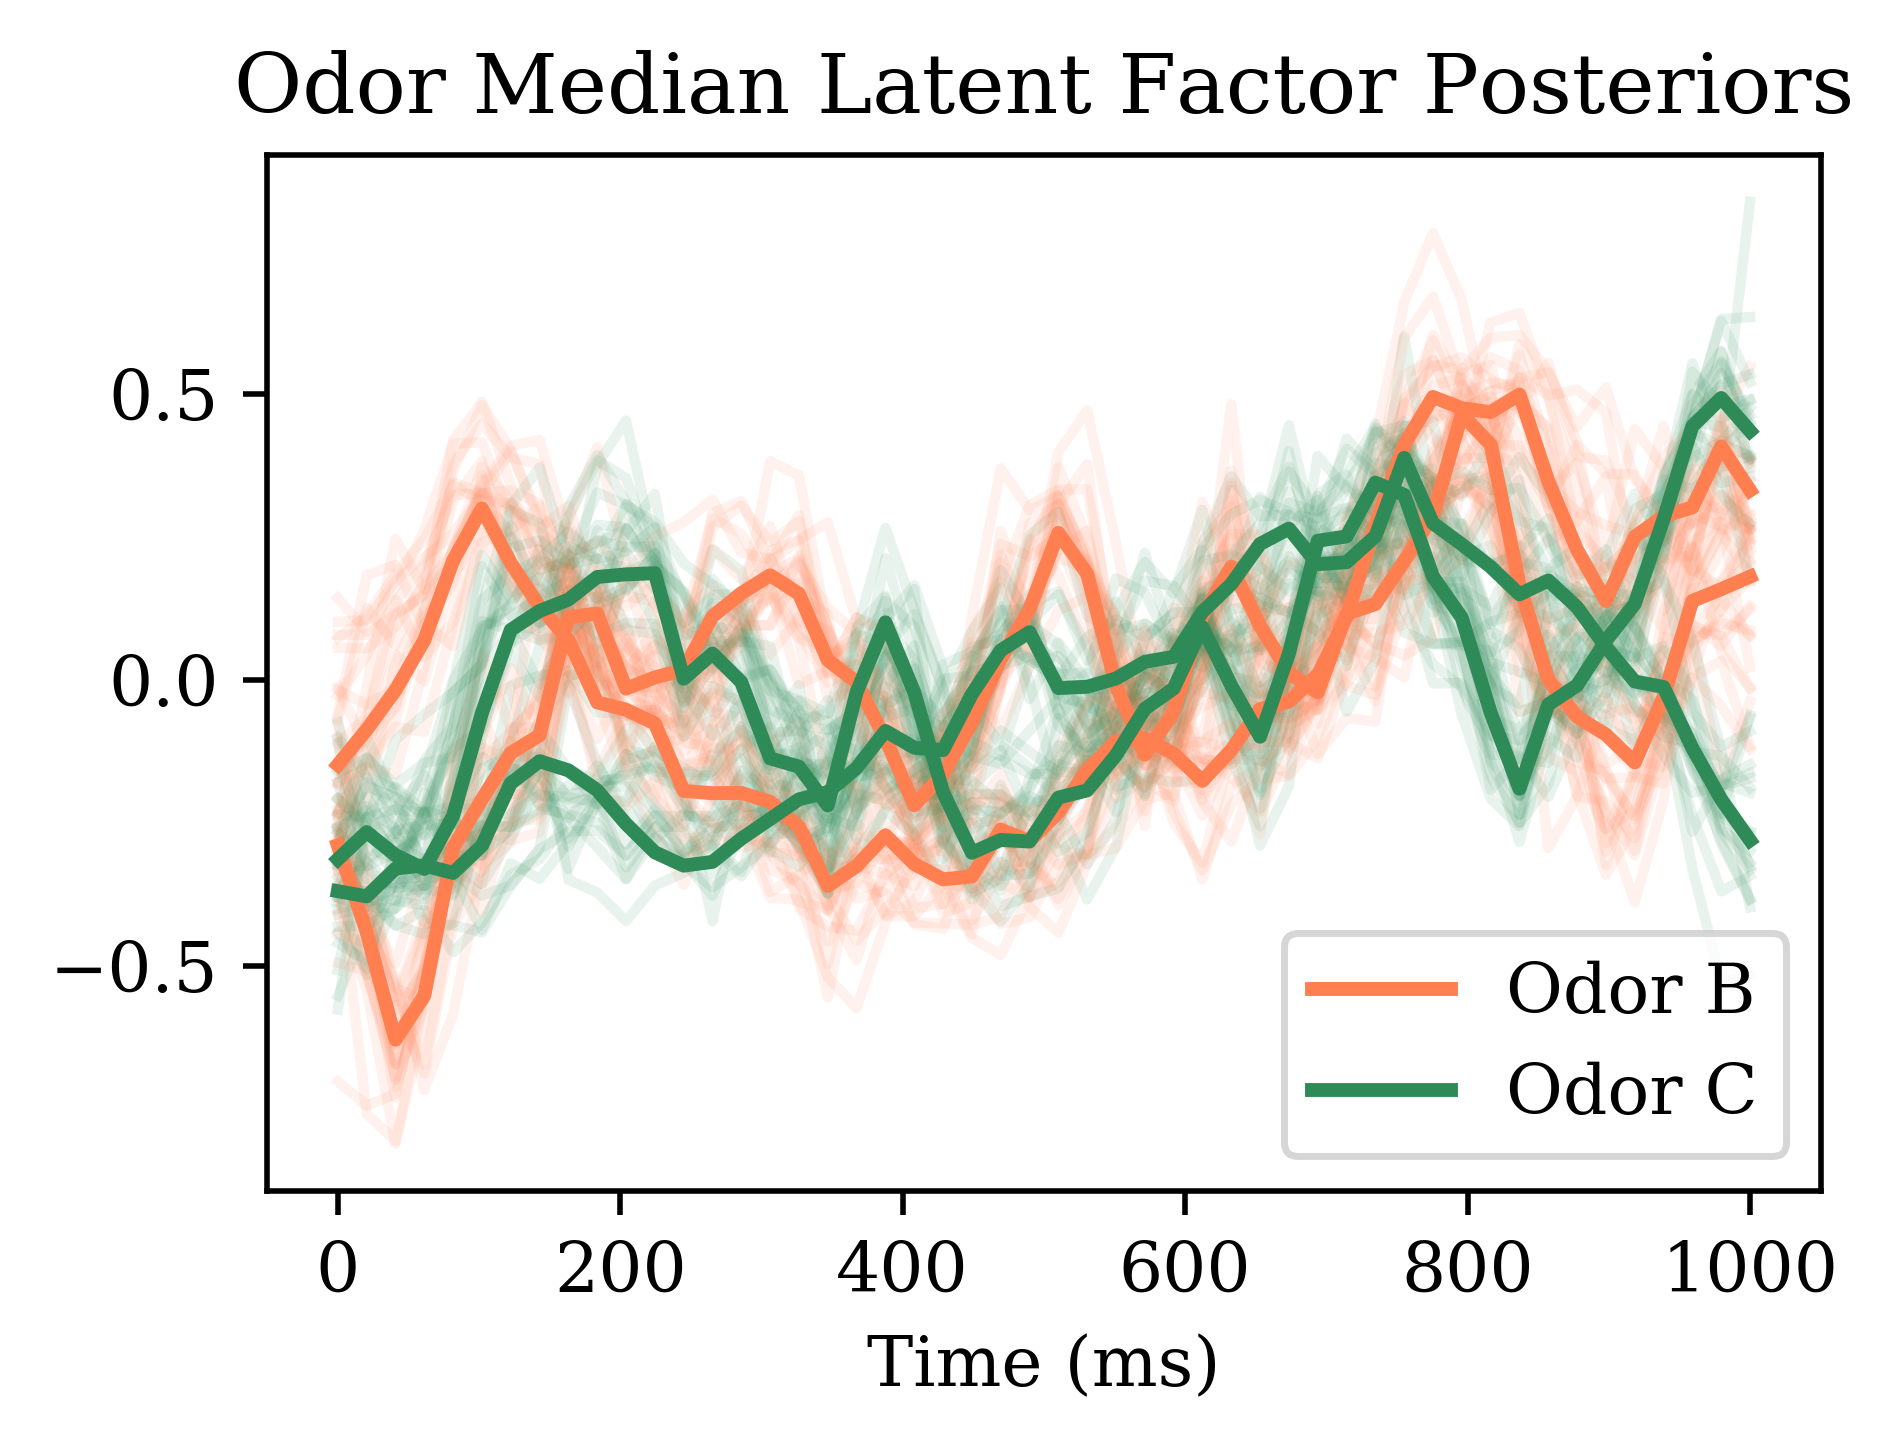

In [113]:
fig = plt.figure(figsize=(4, 3), dpi=500)
x = np.linspace(0, 1000, 50)
for i in range(20):
    plt.plot(x, factor1_median_odor_B[i, :], color='coral', alpha=0.1)
    plt.plot(x, factor2_median_odor_B[i, :], color='coral', alpha=0.1)
    plt.plot(x, factor1_median_odor_C[i, :], color='seagreen', alpha=0.1)
    plt.plot(x, factor2_median_odor_C[i, :], color='seagreen', alpha=0.1)
plt.plot(x, np.median(factor1_median_odor_B, axis=0), color='coral', label='Odor B', lw=2)
plt.plot(x, np.median(factor2_median_odor_B, axis=0), color='coral', lw=2)
plt.plot(x, np.median(factor1_median_odor_C, axis=0), color='seagreen', label='Odor C', lw=2)
plt.plot(x, np.median(factor2_median_odor_C, axis=0), color='seagreen', lw=2)
plt.title('Odor Median Latent Factor Posteriors')
plt.xlabel('Time (ms)')
plt.legend()
fig.tight_layout()
plt.savefig('latent.png')
plt.show()

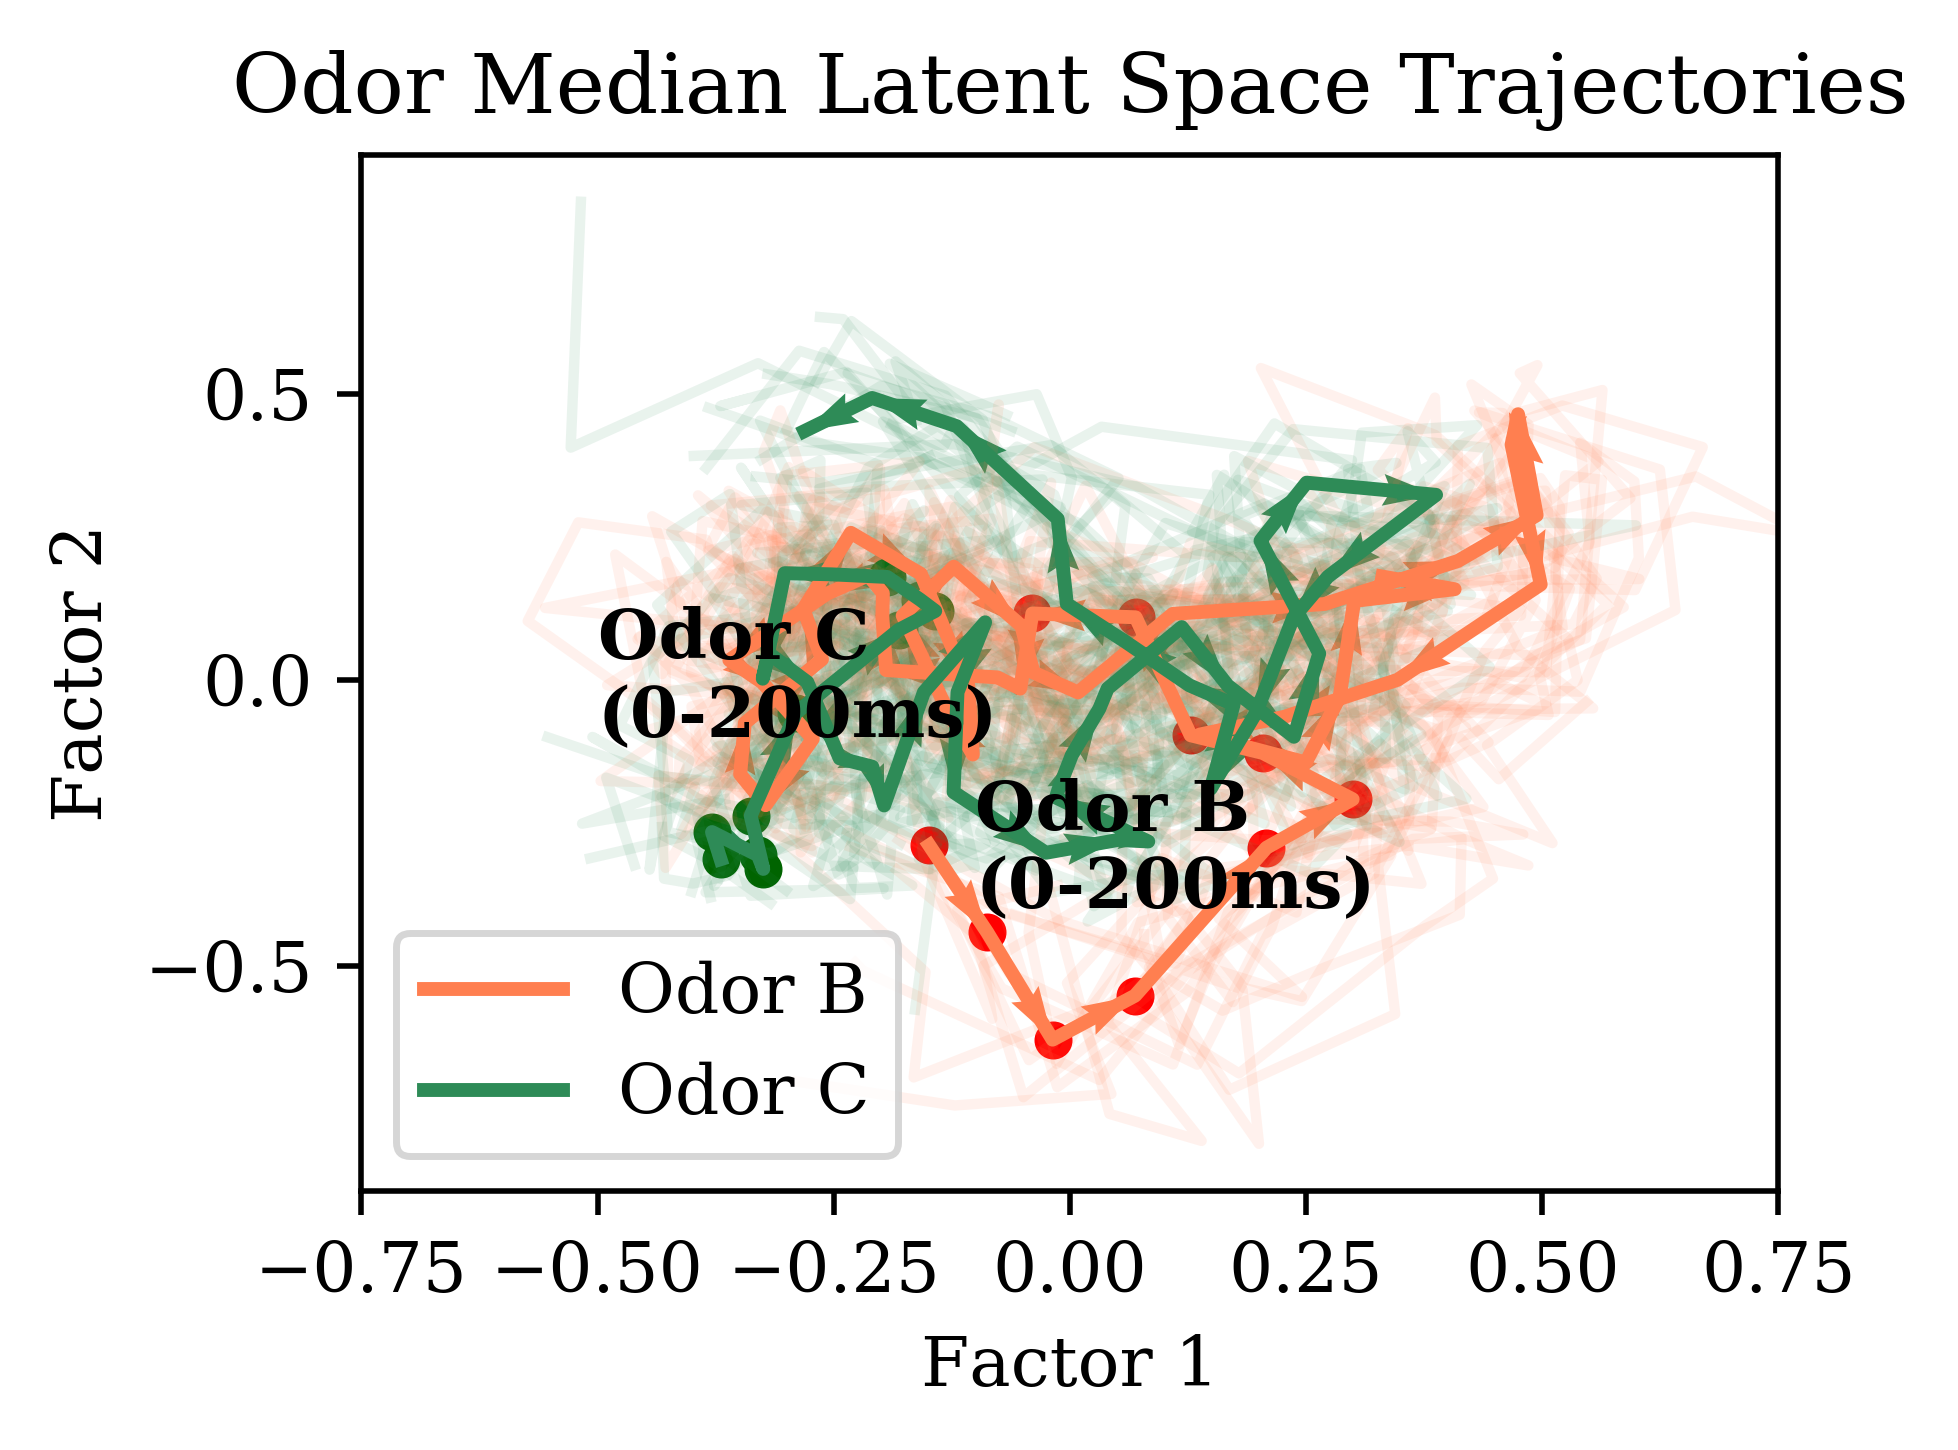

In [143]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)

for i in range(20):
    plt.plot(factor1_median_odor_B[i, :], factor2_median_odor_B[i, :], color='coral', alpha=0.1)
    plt.plot(factor1_median_odor_C[i, :], factor2_median_odor_C[i, :], color='seagreen', alpha=0.1)

plt.plot(np.median(factor1_median_odor_B, axis=0), np.median(factor2_median_odor_B, axis=0), 
         color='coral', lw=2, label='Odor B')

x1 = np.median(factor1_median_odor_B, axis=0)
y1 = np.median(factor2_median_odor_B, axis=0)
plt.quiver(x1[:-1], y1[:-1], x1[1:]-x1[:-1], y1[1:]-y1[:-1], scale_units='xy', angles='xy', scale=1, color='coral')

plt.plot(np.median(factor1_median_odor_C, axis=0), np.median(factor2_median_odor_C, axis=0), 
         color='seagreen', lw=2, label='Odor C')

x2 = np.median(factor1_median_odor_C, axis=0)
y2 = np.median(factor2_median_odor_C, axis=0)
plt.quiver(x2[:-1], y2[:-1], x2[1:]-x2[:-1], y2[1:]-y2[:-1], scale_units='xy', angles='xy', scale=1, color='seagreen')

plt.scatter(np.median(factor1_median_odor_B, axis=0)[:10], np.median(factor2_median_odor_B, axis=0)[:10], 
            s=20, color='red')
plt.scatter(np.median(factor1_median_odor_C, axis=0)[:10], np.median(factor2_median_odor_C, axis=0)[:10], 
            s=20, color='darkgreen')

ax.text(-0.1, -0.4, 'Odor B \n(0-200ms)', fontweight='bold')
ax.text(-0.5, -0.1, 'Odor C \n(0-200ms)', fontweight='bold')

plt.xlim(-0.75, 0.75)
plt.legend()

plt.title('Odor Median Latent Space Trajectories')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')

fig.tight_layout()
plt.savefig('replay.png')
plt.show()

In [151]:
median_separation = np.sqrt((factor1_median_odor_B - factor1_median_odor_C) ** 2 + (factor2_median_odor_B - factor2_median_odor_C) ** 2)

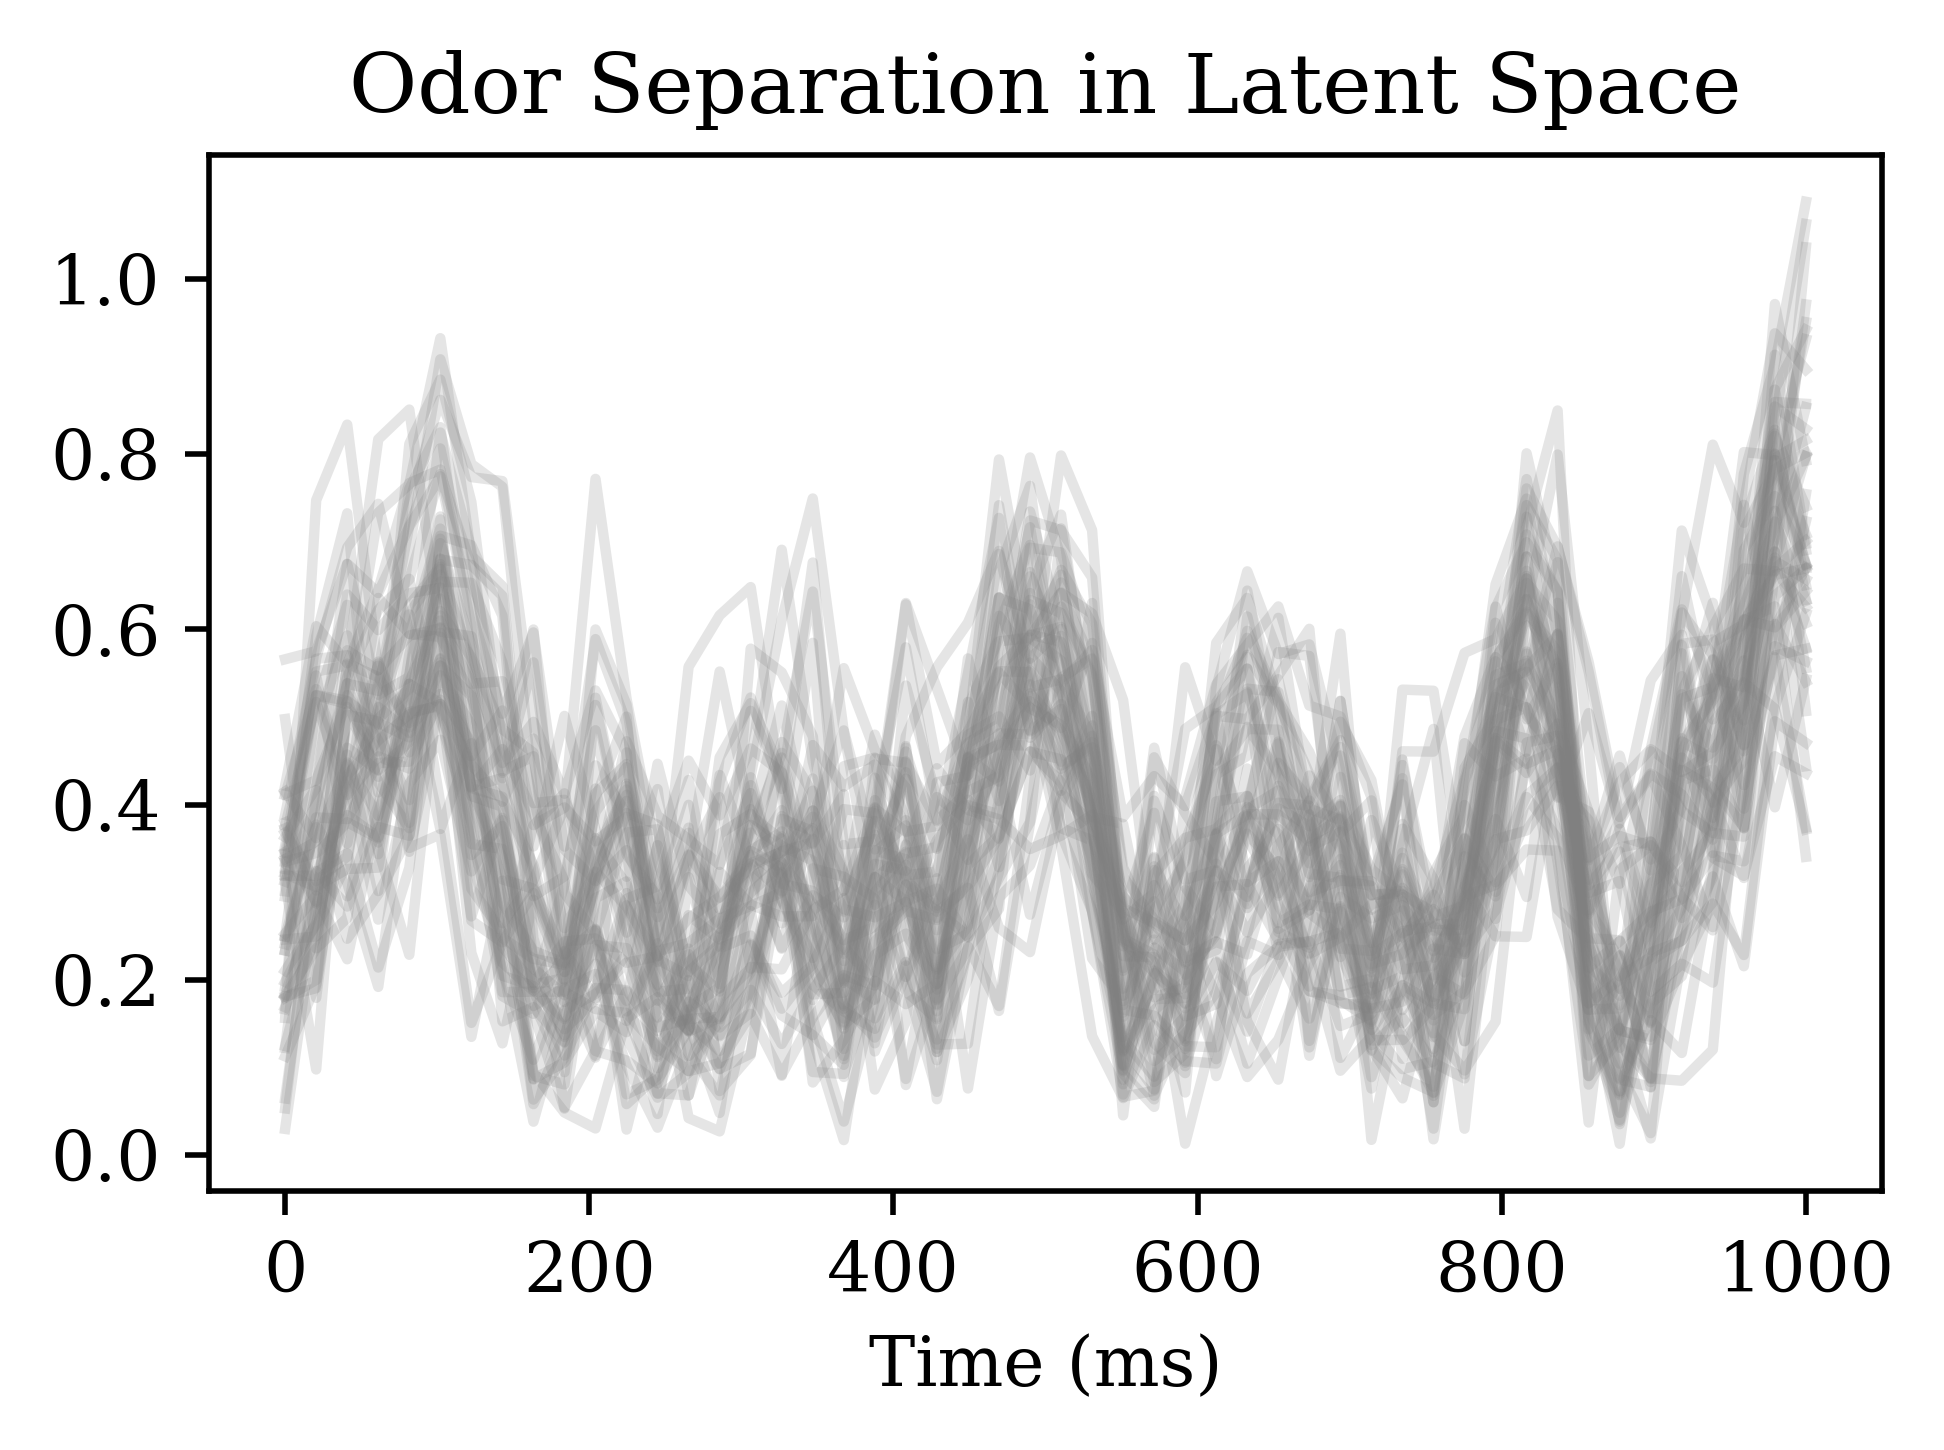

In [152]:
fig = plt.figure(figsize=(4, 3), dpi=500)
x = np.linspace(0, 1000, 50)
for i in range(50):
    plt.plot(x, median_separation[i, :], color='gray', alpha=0.2)
plt.title('Odor Separation in Latent Space')
plt.xlabel('Time (ms)')
fig.tight_layout()
#plt.savefig('separation2.png')
plt.show()

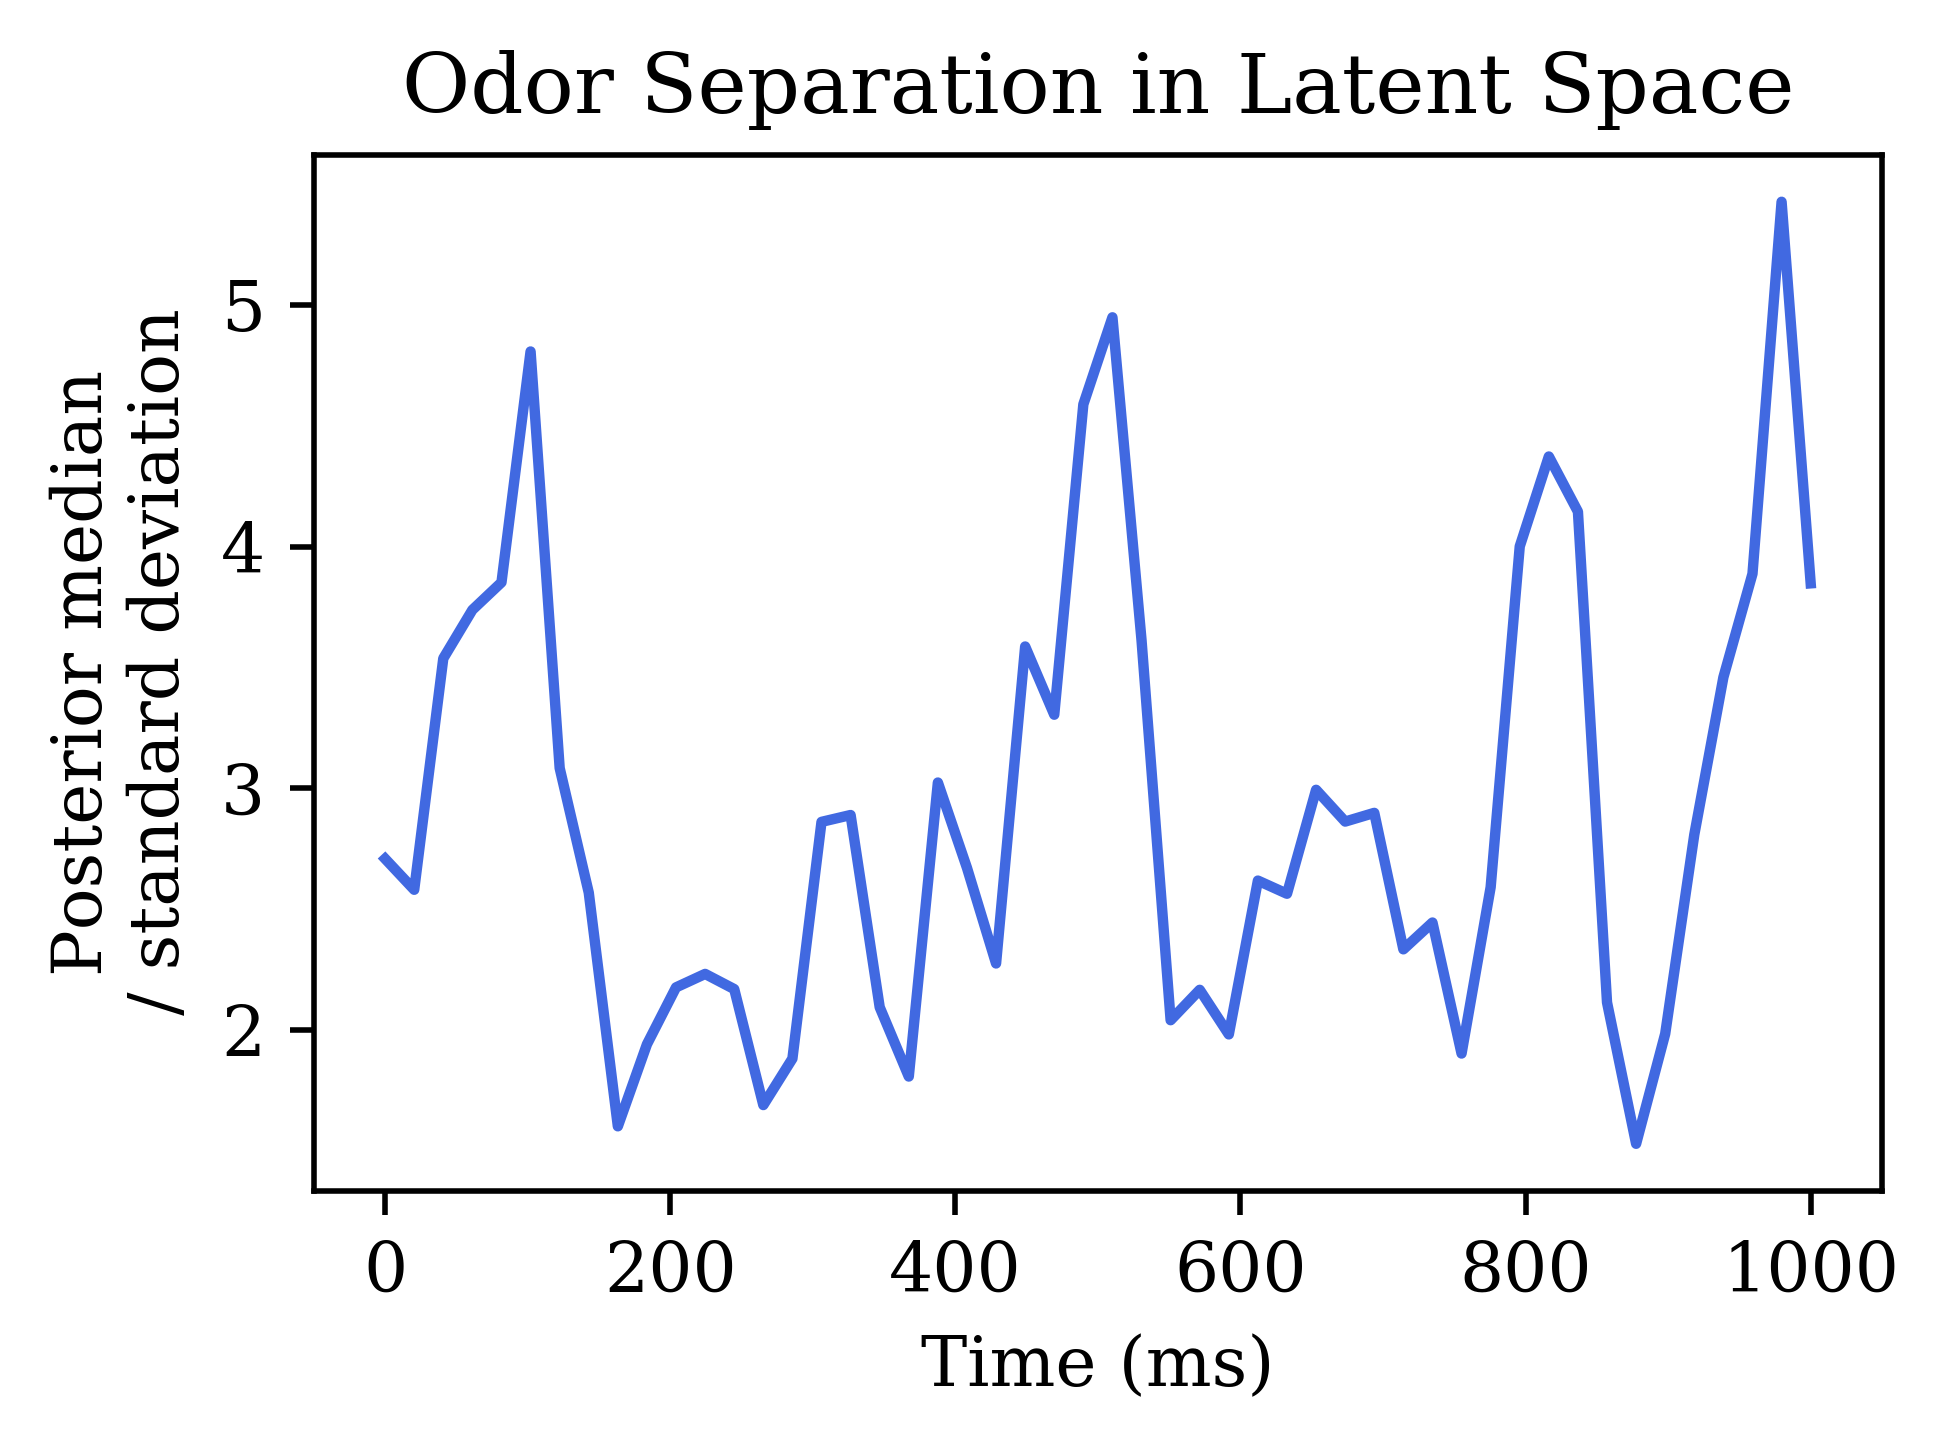

In [153]:
fig = plt.figure(figsize=(4, 3), dpi=500)
x = np.linspace(0, 1000, 50)
plt.plot(x, np.median(median_separation, axis=0) / np.std(median_separation, axis=0), color='royalblue')
plt.title('Odor Separation in Latent Space')
plt.xlabel('Time (ms)')
plt.ylabel('Posterior median\n / standard deviation')
fig.tight_layout()
plt.savefig('separation2.png')
plt.show()

In [154]:
new_separation = np.median(median_separation, axis=0) / np.std(median_separation, axis=0)

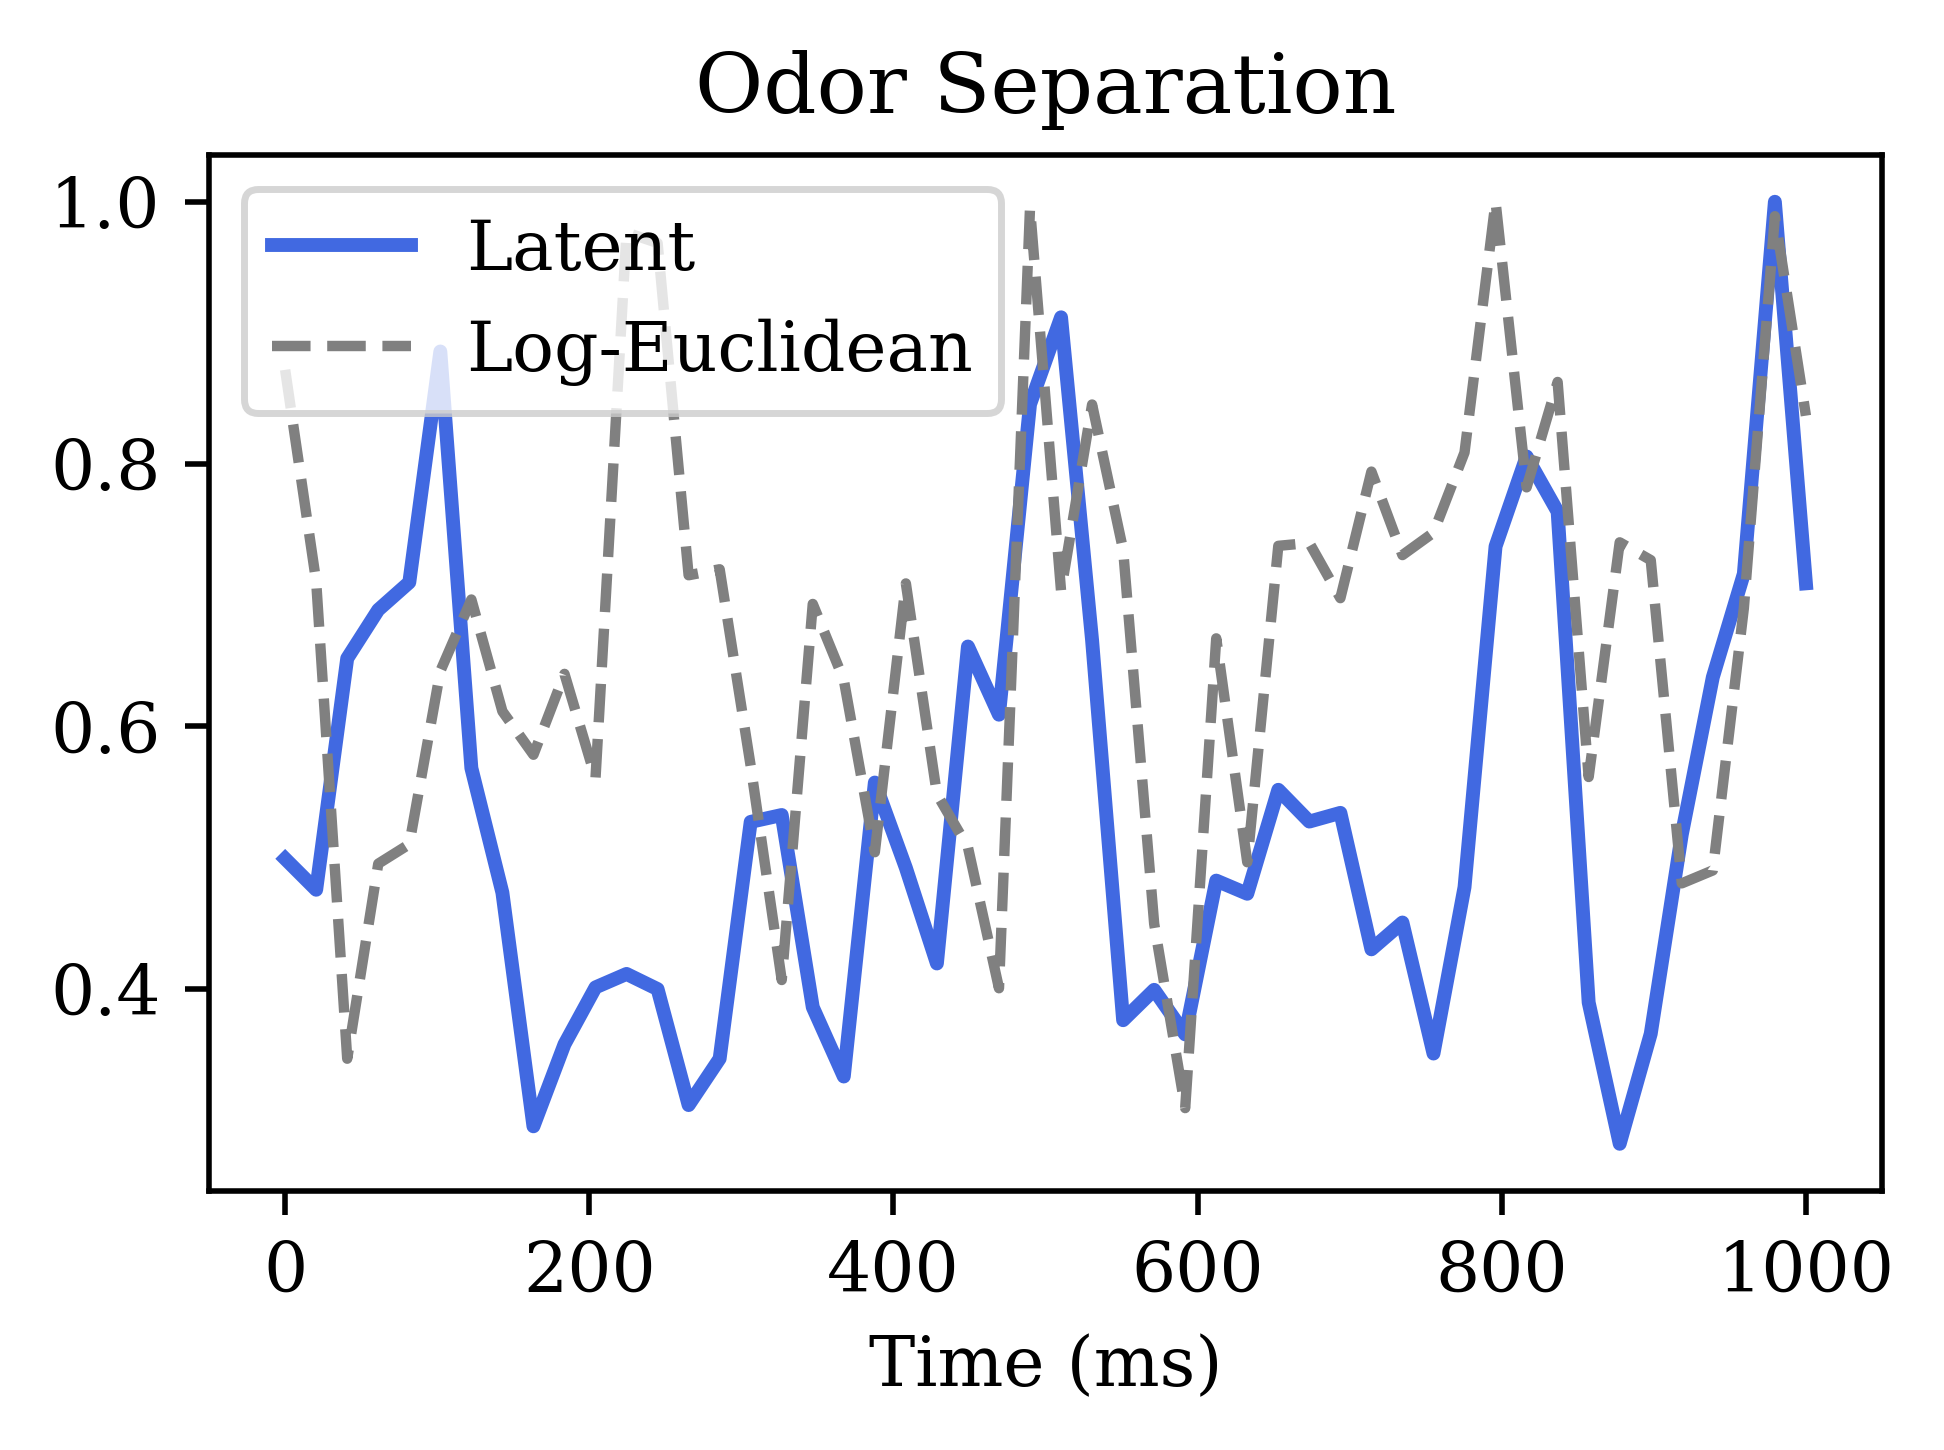

In [163]:
fig = plt.figure(figsize=(4, 3), dpi=500)
x = np.linspace(0, 1000, 50)
plt.plot(x, new_separation / np.max(new_separation), color='royalblue', lw=2, label='Latent')
plt.plot(x, median_separation / np.max(median_separation), '--', color='gray', label='Log-Euclidean')
plt.legend()
plt.title('Odor Separation')
plt.xlabel('Time (ms)')
fig.tight_layout()
plt.savefig('separation.png')
plt.show()